# Homework 1 Part 2

This is an individual assignment.

---

Write your own code. You may repurpose any functions built during lecture. You may use ```scikit-learn``` functions.

---

In [1]:
# Import libraries and magics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd


---

# Exercise 1 (5 points)

In this question, you will practice how to use HiPerGator and Git to maintain your code.

1. (1 point) Open Open On-Demand [ood.rc.ufl.edu](ood.rc.ufl.edu) and create an interactive jupyter session with the following specifications: 2 CPU, 2 GPU (type = 'a100') and 4 GB of RAM. **Attach a screenshot of your jupyter notebook card, your gatorlink should be visible.**

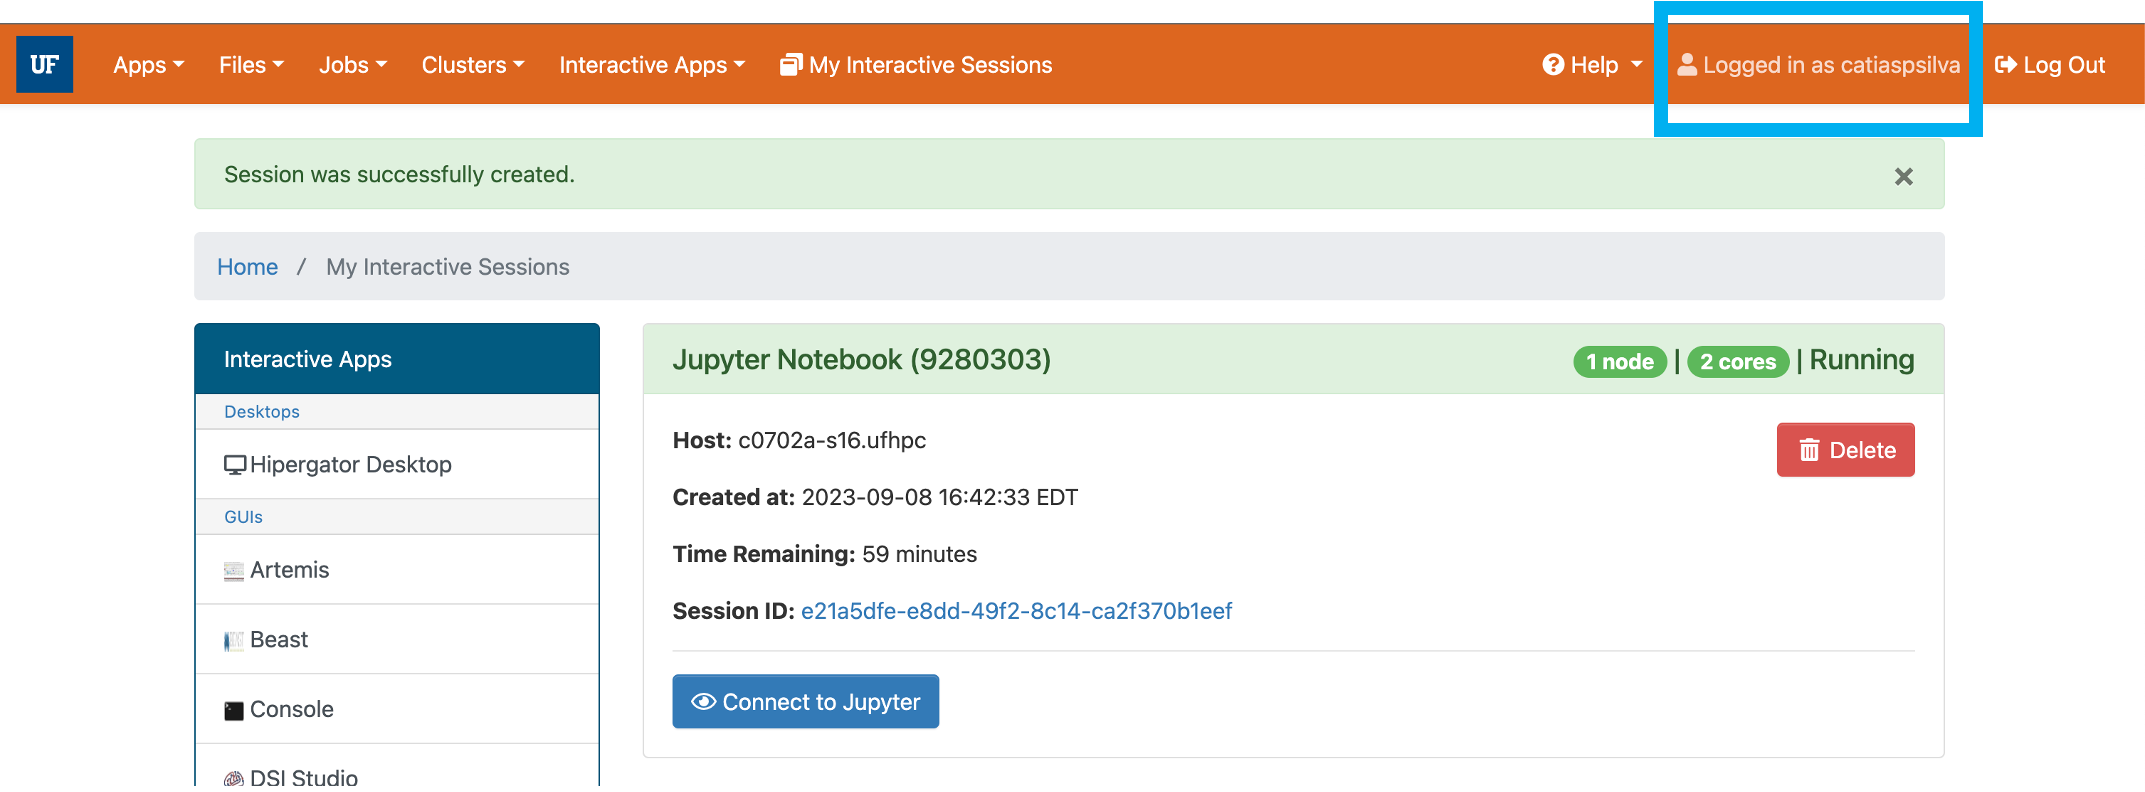

In [2]:
from IPython.display import Image
Image('figures/ood_rc.png', width=900)

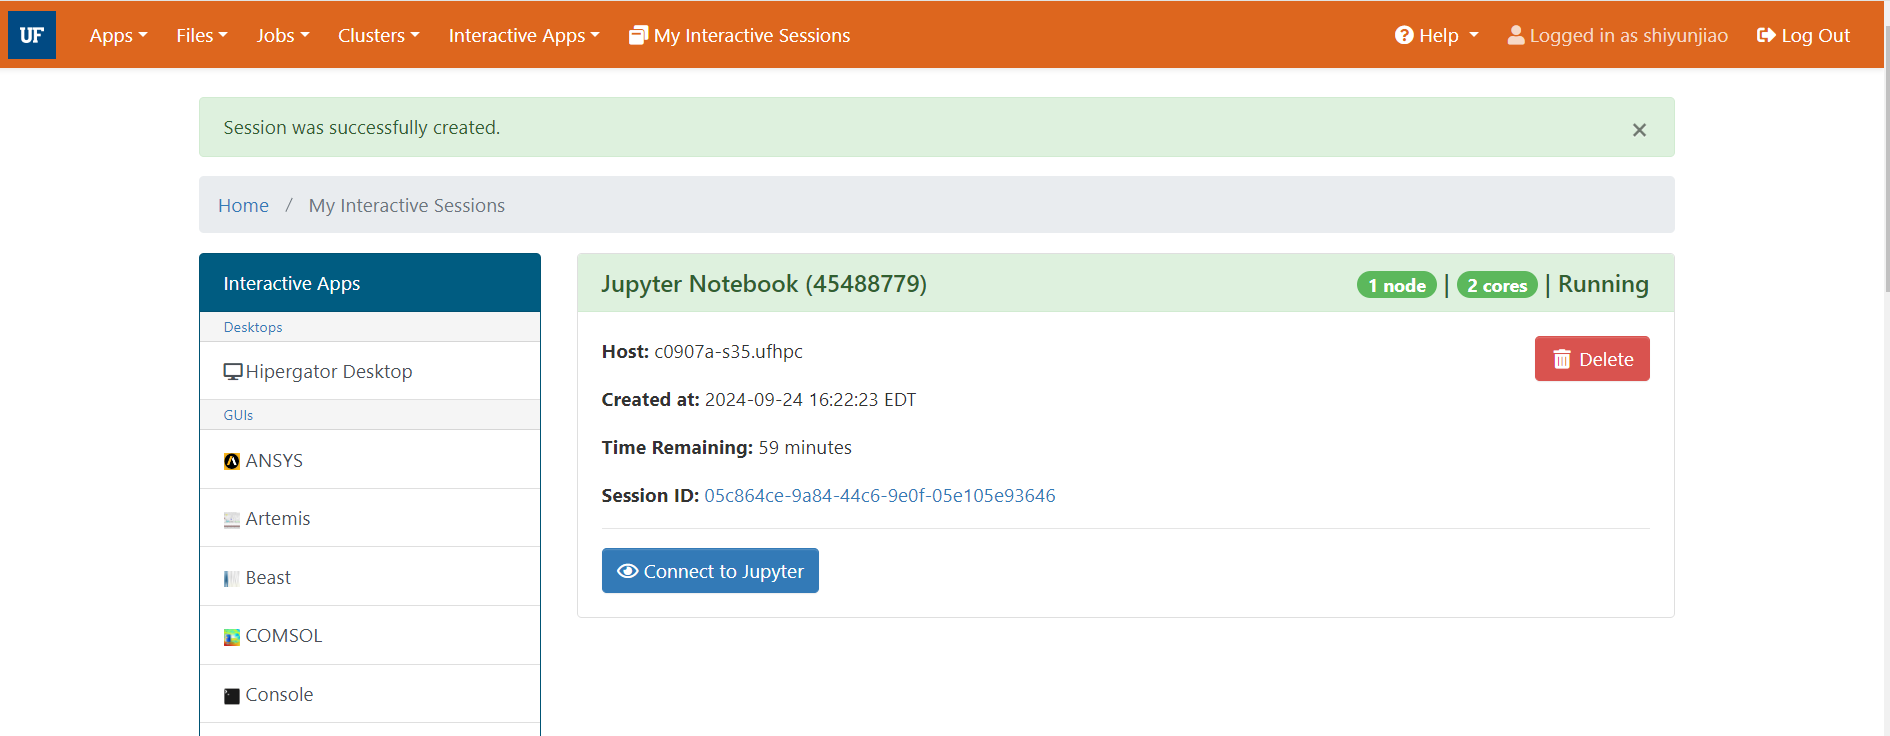

2. (2 points) Create a symbolic link to map the class blue directory in your homepage. **Attach a screenshot to show that this link has been created.**

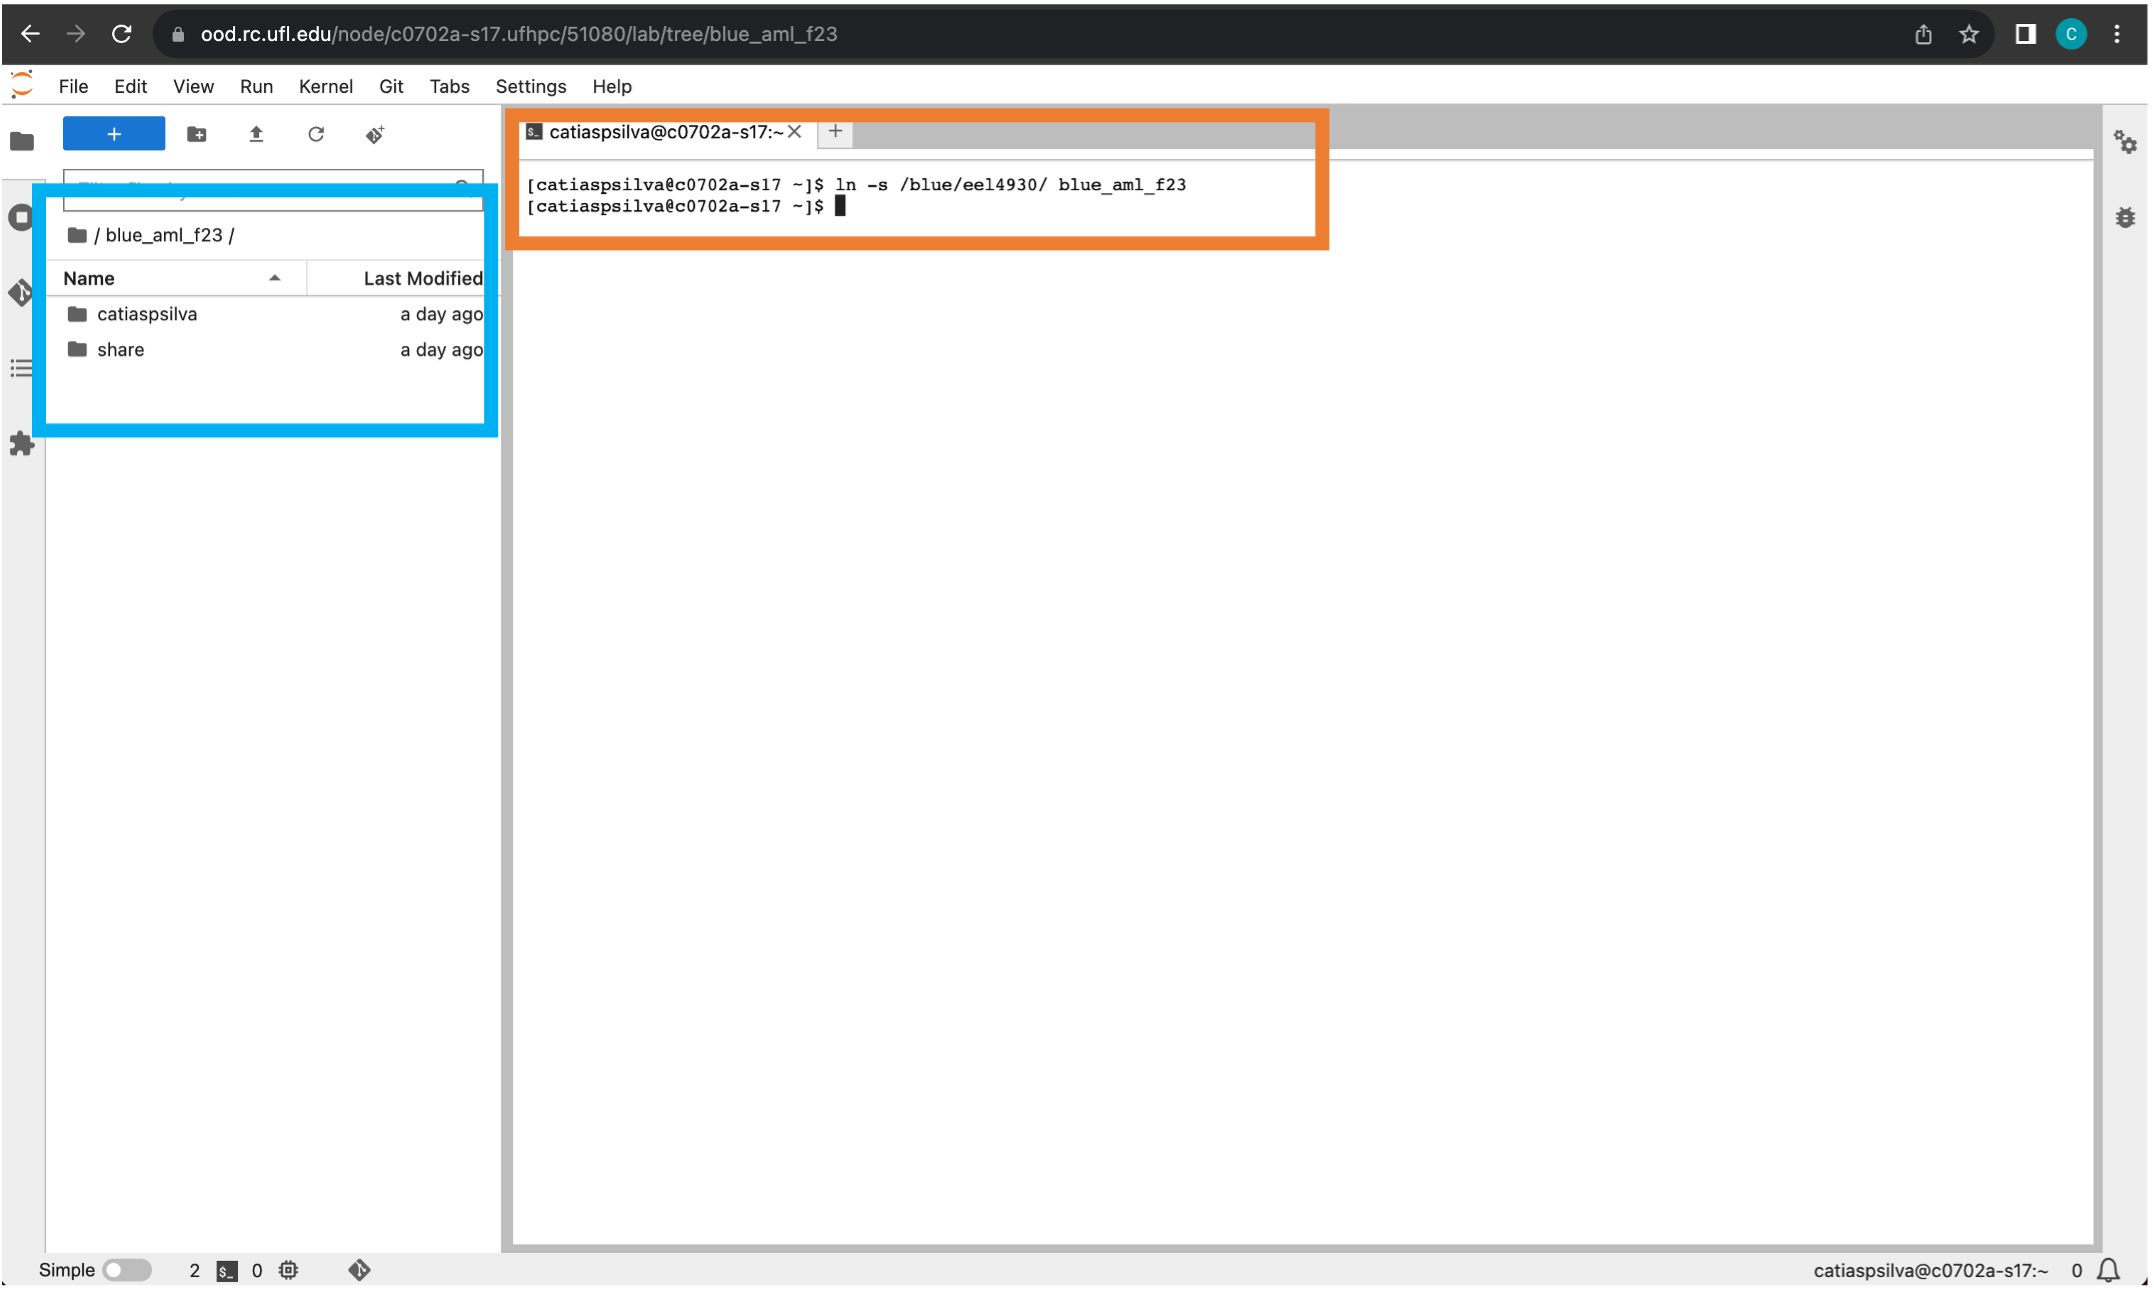

In [3]:
Image('figures/symbolic_link.png', width=900)

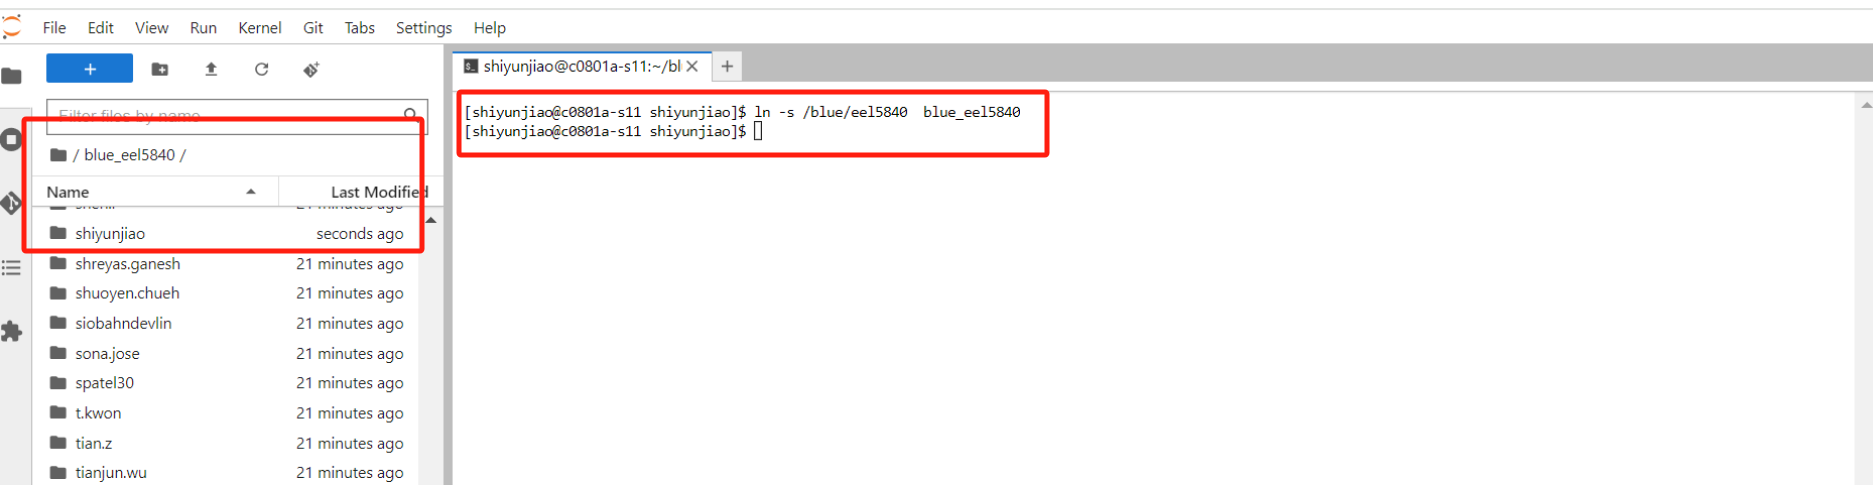

3. (2 points) Navigate to your folder within the symbolic link you just created. Clone the HW0 repository inside that folder - see the picture below. If you clone outside your personal and private folder (mine is blue_aml_f23/catiaspsilva), you will lose points. **Attach a screenshot.**

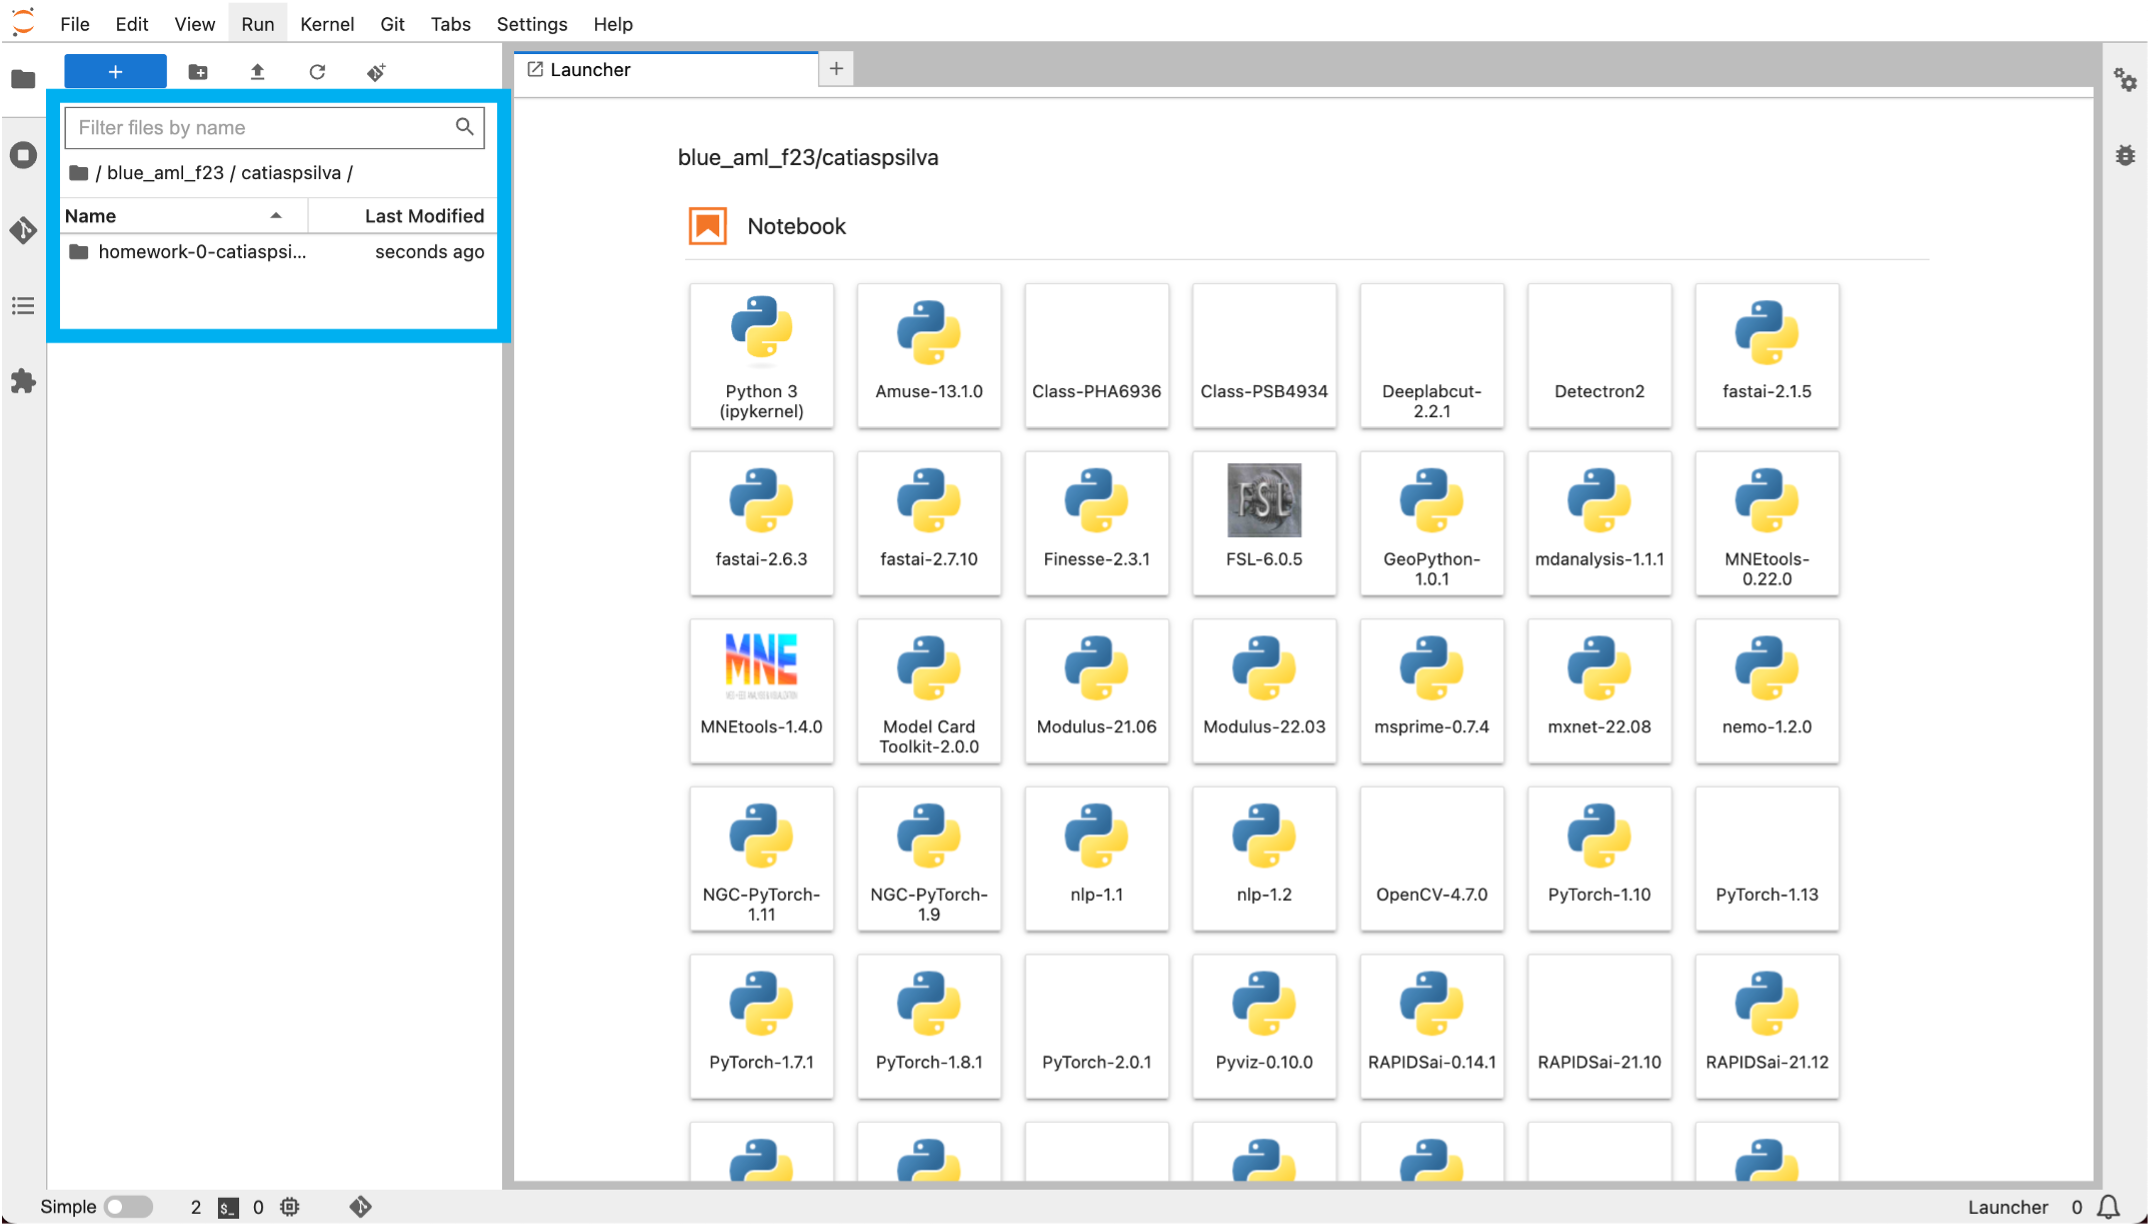

In [4]:
Image('figures/cloning_repo.png', width=900)

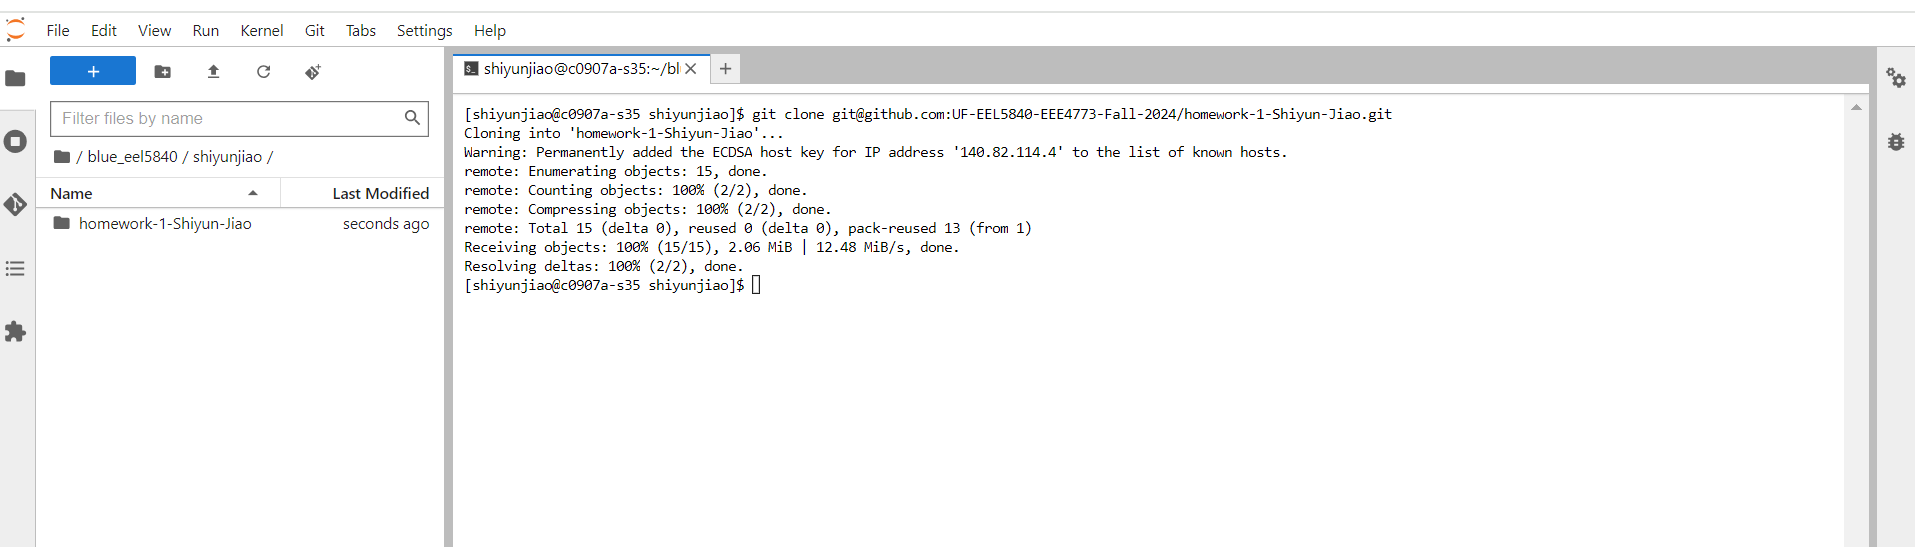

---

# Exercise 2 (20 points)

**Consider the noisy sinusoidal data we have been working with from lecture.**

**Build a linear regression model with Gaussian basis functions as feature representations of the data. Consider the Gaussian basis functions:**

\begin{align*}
\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2\sigma^2}\right\}
\end{align*}

**where $\mu=\{0.1, 0.3, 0.6, 0.9\}$ for $j=1,2,3,4$, respectively, and a fixed standard deviation $\sigma=0.1$.**

1. (7 points) **Train this model using the training set generated below.**

2. (7 points) **Make predictions using the test set.**

3. (6 points) **Provide a paragraph discussion about how you would determine how many Gaussian basis functions you would need and how would you determine the mean values $\mu_j$ and the bandwidth parameter $\sigma$.**

In [11]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

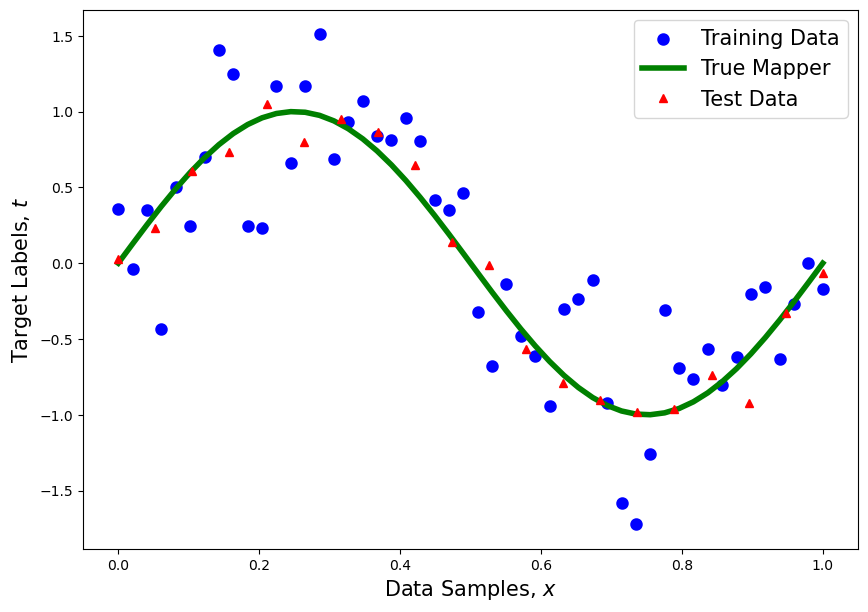

In [13]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

# Plotting
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

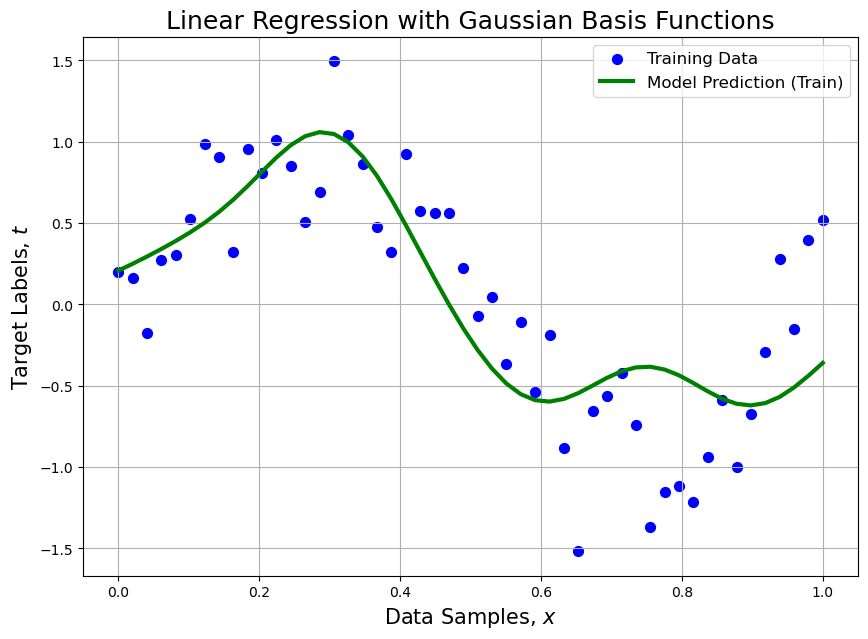

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_basis_function(x, mu, sigma):
    """Compute the Gaussian basis function for input x, center mu, and std deviation sigma."""
    return np.exp(-0.5 * ((x - mu) ** 2) / sigma ** 2)

def design_matrix(x, mu_values, sigma):
    """Construct the design matrix Phi using Gaussian basis functions."""
    Phi = np.zeros((x.shape[0], len(mu_values)))
    for i, mu in enumerate(mu_values):
        Phi[:, i] = gaussian_basis_function(x, mu, sigma)
    return Phi

mu_values = [0.1, 0.3, 0.6, 0.9]  
sigma = 0.1  

N_train = 50 
a, b = [0, 1] 
sigma_train = 0.4 

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train)  

Phi_train = design_matrix(x_train, mu_values, sigma)

model = LinearRegression()
model.fit(Phi_train, t_train)

t_train_pred = model.predict(Phi_train)

plt.figure(figsize=(10, 7))

# Plot the noisy training data
plt.scatter(x_train, t_train, c='b', s=50, label='Training Data')

# Plot the model's predictions on the training data
plt.plot(x_train, t_train_pred, 'g-', linewidth=3, label='Model Prediction (Train)')

plt.xlabel('Data Samples, $x$', size=15)
plt.ylabel('Target Labels, $t$', size=15)
plt.title('Linear Regression with Gaussian Basis Functions', size=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

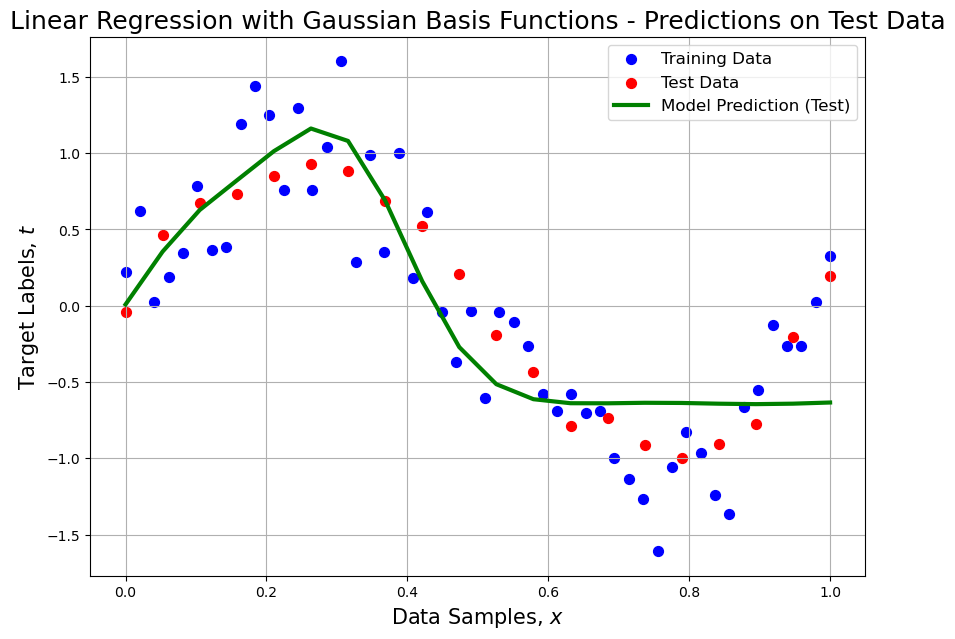

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_basis_function(x, mu, sigma):
    """Compute the Gaussian basis function for input x, center mu, and std deviation sigma."""
    return np.exp(-0.5 * ((x - mu) ** 2) / sigma ** 2)

def design_matrix(x, mu_values, sigma):
    """Construct the design matrix Phi using Gaussian basis functions."""
    Phi = np.zeros((x.shape[0], len(mu_values)))
    for i, mu in enumerate(mu_values):
        Phi[:, i] = gaussian_basis_function(x, mu, sigma)
    return Phi

mu_values = [0.1, 0.3, 0.6, 0.9]  
sigma = 0.1 

N_train = 50  
N_test = 20   
a, b = [0, 1]  
sigma_train = 0.4  
sigma_test = 0.1   


x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train)  
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test)  


Phi_train = design_matrix(x_train, mu_values, sigma)


model = LinearRegression()
model.fit(Phi_train, t_train)

# Make predictions using the test set
Phi_test = design_matrix(x_test, mu_values, sigma)  # design matrix for test data
t_test_pred = model.predict(Phi_test)  # predictions on test data

# Plot the training data, test data, and model's predictions
plt.figure(figsize=(10, 7))

# Plot the noisy training data
plt.scatter(x_train, t_train, c='b', s=50, label='Training Data')

# Plot the noisy test data
plt.scatter(x_test, t_test, c='r', s=50, label='Test Data')

# Plot the model's predictions on the test data
plt.plot(x_test, t_test_pred, 'g-', linewidth=3, label='Model Prediction (Test)')

plt.xlabel('Data Samples, $x$', size=15)
plt.ylabel('Target Labels, $t$', size=15)
plt.title('Linear Regression with Gaussian Basis Functions - Predictions on Test Data', size=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

3，the process of selecting the number of Gaussian basis functions, mean values, and the bandwidth parameter involves a combination of exploratory
data analysis, domain knowledge, and empirical testing through validation techniques. This iterative approach helps ensure that the model captures the 
essential patterns in the data while maintaining robustness against noise and variability.

---

# Exercise 3 (20 points)

**Consider the diabetes data:**

In [99]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(return_X_y=False)
# print(diabetes.DESCR)

**This dataset is already described in the _feature space_. Each input sample $x_i$ is described as 10-dimensional feature vctor $\phi(x_i)$. The features correspond to: age, sex, bmi, bp, s1, s2, s3, s4, s5 and s6 measurements (read the description above for more details). The target variable corresponds a measure of diabetes disease progression one year after baseline.**

**Let's load the data as a ```pandas``` dataframe:**

In [103]:
df_diabetes = pd.DataFrame(data=np.hstack((diabetes.target[:,np.newaxis],diabetes.data)), 
                  columns=['Target']+diabetes.feature_names)

df_diabetes

,Target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [105]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  442 non-null    float64
 1   age     442 non-null    float64
 2   sex     442 non-null    float64
 3   bmi     442 non-null    float64
 4   bp      442 non-null    float64
 5   s1      442 non-null    float64
 6   s2      442 non-null    float64
 7   s3      442 non-null    float64
 8   s4      442 non-null    float64
 9   s5      442 non-null    float64
 10  s6      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**The goal is to fit a linear regression model on the provided features, i.e., the model is of the form:**

$$y(x) = w_0 + w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + \dots + w_{10}\phi_{10}(x)$$

**where $w_0$ is the bias (or intercept) coefficient and all other $w_i, i=1,\dots,10$ correspond to the coefficient associated with feature $\phi_i$ (age, sex, bmi, bp, etc.).**

In [108]:
data=df_diabetes[df_diabetes.columns[1:]].to_numpy()

data.shape

(442, 10)

In [86]:
target = df_diabetes['Target'].to_numpy().reshape(-1,1)

target.shape

(442, 1)

**Answer the following questions:**

1. (2 points) **Randomly partition the data into training (70%) and test sets (30%) with a fixed random seed generator.**

2. (6 points) **Use a 5-fold cross-validation strategy to determine the hyperparameter values to fit a linear regression model with ridge regularization for this dataset. Show and document your work.**

3. (4 points) **Evaluate performance in the test set.**

4. (4 points) **Determine the final value for the intercept and coefficients of the linear regression model. Plot all 11 values as a ```stem``` plot.**

5. (4 points) **Based on this plot, which input variable (also referred to the independent variable) has the most contribution for predicting the target variable (also referred to the dependent variable)?**

In [113]:
from sklearn.model_selection import train_test_split

# Set a fixed random seed for reproducibility
random_seed = 42

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=random_seed)

# Print the shapes to verify
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309, 1) (133, 1)


In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the Ridge model
ridge = Ridge()

# Define hyperparameter values to tune
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# 5-fold cross-validation
ridge_cv = GridSearchCV(estimator=ridge, param_grid=params, cv=5, scoring='neg_mean_squared_error')

# Fit the model
ridge_cv.fit(X_train, y_train)

# Display the best hyperparameter and the corresponding MSE
best_alpha = ridge_cv.best_params_['alpha']
print(f'Best alpha: {best_alpha}')
print(f'Best cross-validation score (negative MSE): {ridge_cv.best_score_}')

Best alpha: 0.01
Best cross-validation score (negative MSE): -3169.9730043382137


In [117]:
# Fit the Ridge regression model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_best.predict(X_test)

# Evaluate performance using MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test set MSE: {test_mse}')

Test set MSE: 2819.688330911985


Intercept: [150.96485523]
Coefficients: [[  34.16732784 -254.04331602  550.84488152  379.12670807 -404.25326283
   123.02921897  -99.04167392  215.03262419  463.84263427   50.35149031]]


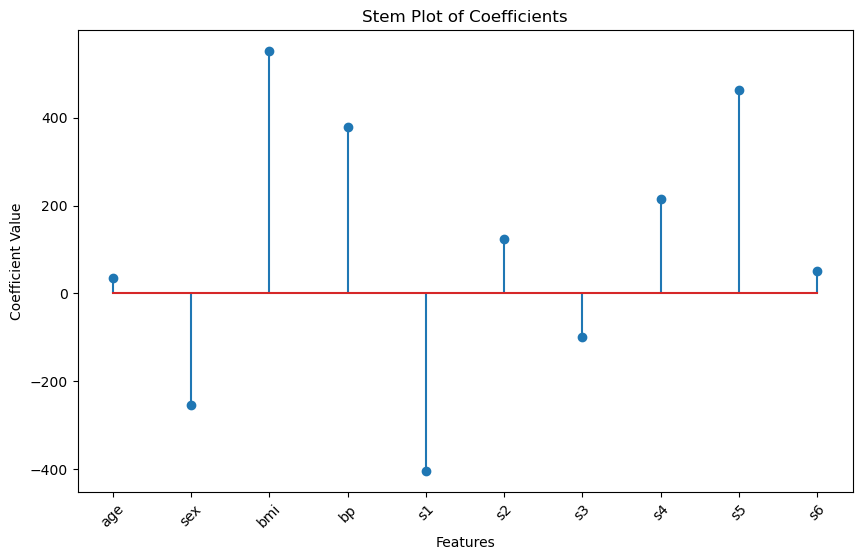

In [119]:
# Get the intercept and coefficients
intercept = ridge_best.intercept_
coefficients = ridge_best.coef_

# Print the intercept and coefficients
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Plot the coefficients using a stem plot
plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, 11), coefficients.ravel())
plt.xticks(np.arange(1, 11), df_diabetes.columns[1:], rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Stem Plot of Coefficients')
plt.show()

In [121]:
# Find the index of the feature with the largest absolute coefficient
max_contribution_idx = np.argmax(np.abs(coefficients))
max_contribution_feature = df_diabetes.columns[1:][max_contribution_idx]

print(f'The feature with the most contribution is: {max_contribution_feature}')

The feature with the most contribution is: bmi


---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___